In [1]:
#relevant imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#aggregating collected data
dataset_0 = pd.read_csv("./BTC/BTC_Book_0.csv", index_col = 0, parse_dates = True)
dataset_1 = pd.read_csv("./BTC/BTC_Book_1.csv", index_col = 0, parse_dates = True)
dataset_2 = pd.read_csv("./BTC/BTC_Book_2.csv", index_col = 0, parse_dates = True)
dataset_3 = pd.read_csv("./BTC/BTC_Book_3.csv", index_col = 0, parse_dates = True)
dataset_4 = pd.read_csv("./BTC/BTC_Book_4.csv", index_col = 0, parse_dates = True)
dataset_5 = pd.read_csv("./BTC/BTC_Book_5.csv", index_col = 0, parse_dates = True)
dataset_6 = pd.read_csv("./BTC/BTC_Book_6.csv", index_col = 0, parse_dates = True)
dataset_7 = pd.read_csv("./BTC/BTC_Book_7.csv", index_col = 0, parse_dates = True)

full_dataset = dataset_0.append(dataset_1).append(dataset_2).append(dataset_3).append(dataset_4)
full_dataset = full_dataset.append(dataset_5).append(dataset_6).append(dataset_7)

full_dataset.head(1)

,Sequence,Bid_1_Price,Bid_1_Size,Bid_1_Trades,Bid_2_Price,Bid_2_Size,Bid_2_Trades,Bid_3_Price,Bid_3_Size,Bid_3_Trades,...,Ask_47_Trades,Ask_48_Price,Ask_48_Size,Ask_48_Trades,Ask_49_Price,Ask_49_Size,Ask_49_Trades,Ask_50_Price,Ask_50_Size,Ask_50_Trades
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-04-03 17:06:34.424123-04:00,13321475728,6708.69,0.44705,1,6705.57,0.433865,1,6705.56,3.8,1,...,1,6741.24,1.334,1,6743.0,0.058299,1,6743.06,0.927,1


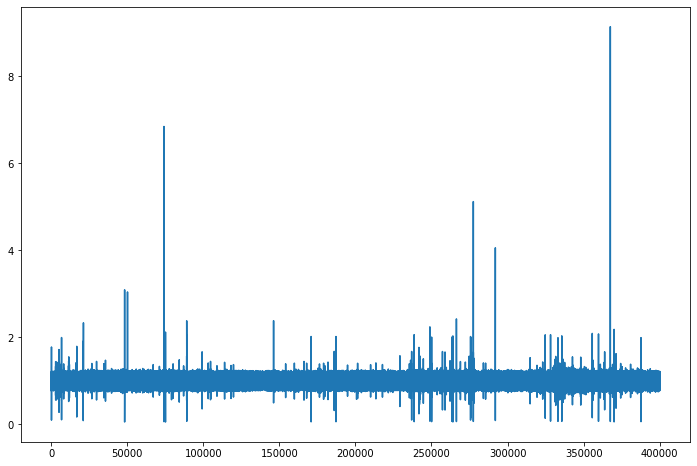

In [3]:
#get index
idx = np.int64(full_dataset.index.values)/1000000000
ts_diffs = np.diff(idx)

#plot timestamp differences
fig, ax= plt.subplots(1,1, figsize = (12,8))
ax.plot(ts_diffs)
plt.show()

#there is some noise in the data, but for the most part, observations are collected ~1 second apart

In [4]:
noise_thres = 1.3
noisy_count = len(ts_diffs[np.where(ts_diffs > noise_thres)])

noisy_rate = noisy_count/len(ts_diffs)
print("%f percent of samples have a large timedelta" % (noisy_rate*100))

0.045750 percent of samples have a large timedelta
